In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Визуализации

In [ ]:
import pandas as pd
import numpy as np

### Столбчатая диаграмма

In [ ]:
sales = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sales_v2023-07-09.csv')
sales.head()

,order_id,date,customer_id,category,region,sales,quantity,discount
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00


<Axes: >

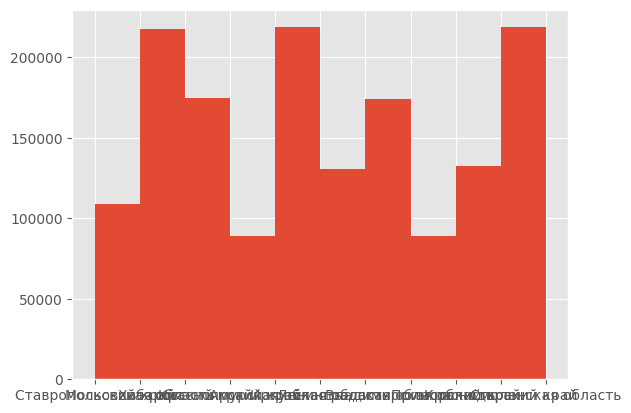

In [ ]:
sales['region'].hist()

Вариант получше

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sales['region'].nunique()

11

Text(0, 0.5, 'Количество заказов')

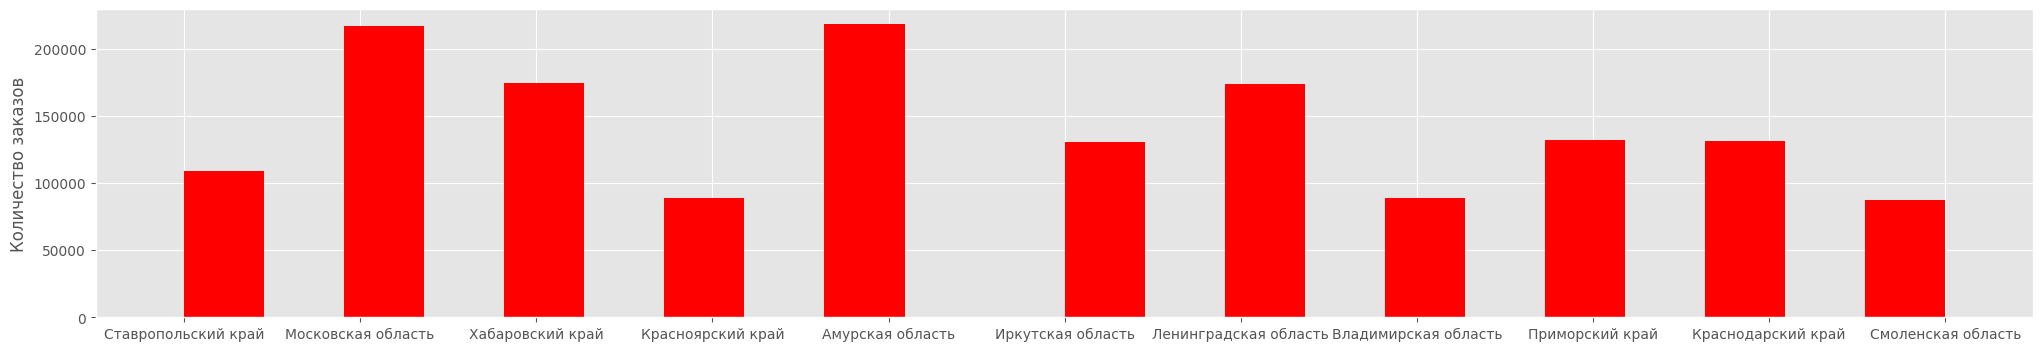

In [ ]:
plt.figure(figsize=(25, 4))

values, bins, bars  = plt.hist(sales['region'], bins=22, color='red')
# plt.hist(sales['region'])
plt.ylabel('Количество заказов')
# plt.legend()

### Добавим выбор региона

In [ ]:
sales['month'] = sales['date'].str.slice(start=0, stop=7)
sales.head()

,order_id,date,customer_id,category,region,sales,quantity,discount,month
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00,2017-10
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05,2017-07
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10,2017-07
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03,2017-02
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00,2017-09


In [ ]:
sales_region_by_month = sales.groupby(['month', 'region']).agg({'sales' : 'sum'}).reset_index()
sales_region_by_month.head()

,month,region,sales
0,2017-01,Амурская область,13892593
1,2017-01,Владимирская область,5268105
2,2017-01,Иркутская область,8489321
3,2017-01,Краснодарский край,8384608
4,2017-01,Красноярский край,5333002


In [ ]:
import plotly.express as px

In [ ]:
sales_region_by_month.head()

,month,region,sales
0,2017-01,Амурская область,13892593
1,2017-01,Владимирская область,5268105
2,2017-01,Иркутская область,8489321
3,2017-01,Краснодарский край,8384608
4,2017-01,Красноярский край,5333002


In [ ]:
sales_region = sales_region_by_month.groupby(['month', 'region'], as_index=False).sum()
sales_region.head()

,month,region,sales
0,2017-01,Амурская область,13892593
1,2017-01,Владимирская область,5268105
2,2017-01,Иркутская область,8489321
3,2017-01,Краснодарский край,8384608
4,2017-01,Красноярский край,5333002


In [ ]:
fig = px.line(sales_region, x='month', y='sales', color='region')

fig.update_layout(
    updatemenus=[
        {
            "buttons": [{ "label": 'Все регионы', "method": "restyle", "args": [{"visible": [True for _ in fig.data]}], }] +
            [
                {
                    "label": t.name,
                    "method": "restyle",
                    "args": [{"visible": [t2.name == t.name for t2 in fig.data]}],
                }
                for t in fig.data
            ]
        }
    ]
)

fig.show()

# Прочее

### Более продвинутый вариант гистограммы

In [ ]:
sales.groupby(['region', 'category']).size().unstack()

category,Аптека,Бытовая техника,Дача и сад,Красота,Мебель,Одежда и обувь,Продукты питания,Спорт и отдых
region,,,,,,,,
Амурская область,30616,17793,26484,8829,4138,41029,53952,36001
Владимирская область,12490,7428,10666,3643,1721,16800,21851,14652
Иркутская область,18264,10783,15701,5429,2481,24695,31969,21338
Краснодарский край,18277,10814,15957,5459,2523,24713,32346,21518
Красноярский край,12487,7290,10707,3623,1746,16665,21916,14520
Ленинградская область,24164,14162,21161,7283,3148,32440,42844,28731
Московская область,30549,17774,26363,9038,3975,40560,53573,35664
Приморский край,18719,10971,15969,5393,2462,24576,32507,21893
Смоленская область,12221,7085,10615,3640,1653,16322,21305,14314


<Axes: xlabel='region'>

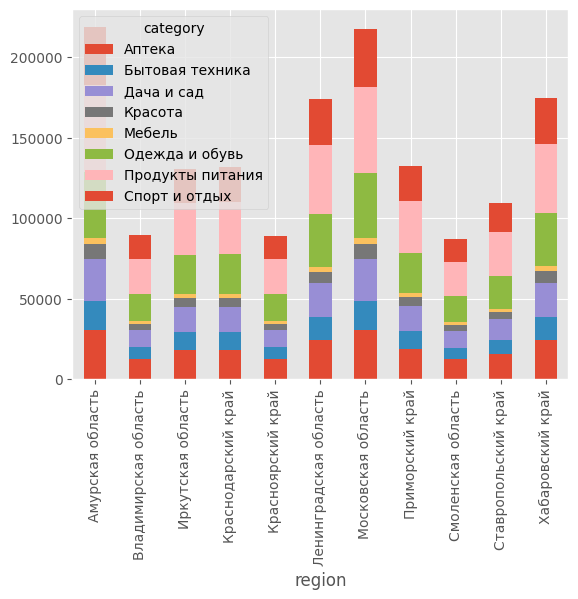

In [ ]:
sales.groupby(['region', 'category']).size().unstack().plot(kind='bar', stacked=True)

### Линейная диаграмма

Выделим год и месяц из даты заказа

In [ ]:
sales['month'] = sales['date'].str.slice(start=0, stop=7)
sales.head()

,order_id,date,customer_id,category,region,sales,quantity,discount,month
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00,2017-10
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05,2017-07
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10,2017-07
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03,2017-02
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00,2017-09


In [ ]:
sales_by_month = sales.groupby(['month', 'category', 'region']).agg({'sales': 'sum'}).reset_index()
sales_by_month.head()

,month,category,region,sales
0,2017-01,Аптека,Амурская область,1255914
1,2017-01,Аптека,Владимирская область,483450
2,2017-01,Аптека,Иркутская область,754794
3,2017-01,Аптека,Краснодарский край,702687
4,2017-01,Аптека,Красноярский край,451583


In [ ]:
sales_graph = sales_by_month.groupby(['month']).agg({'sales': 'sum'}).reset_index()
sales_graph.head()

,month,sales
0,2017-01,100584502
1,2017-02,127351202
2,2017-03,183609747
3,2017-04,218601894
4,2017-05,250450533


([<matplotlib.axis.XTick at 0x7c8813c86810>,
 [Text(1, 0, '2017-02'),
  Text(3, 0, '2017-04'),
  Text(5, 0, '2017-06'),
  Text(7, 0, '2017-08'),
  Text(9, 0, '2017-10'),
  Text(11, 0, '2017-12'),
  Text(13, 0, '2018-02'),
  Text(15, 0, '2018-04'),
  Text(17, 0, '2018-06'),
  Text(19, 0, '2018-08'),
  Text(21, 0, '2018-10'),
  Text(23, 0, '2018-12'),
  Text(25, 0, '2019-02'),
  Text(27, 0, '2019-04'),
  Text(29, 0, '2019-06'),
  Text(31, 0, '2019-08'),
  Text(33, 0, '2019-10')])

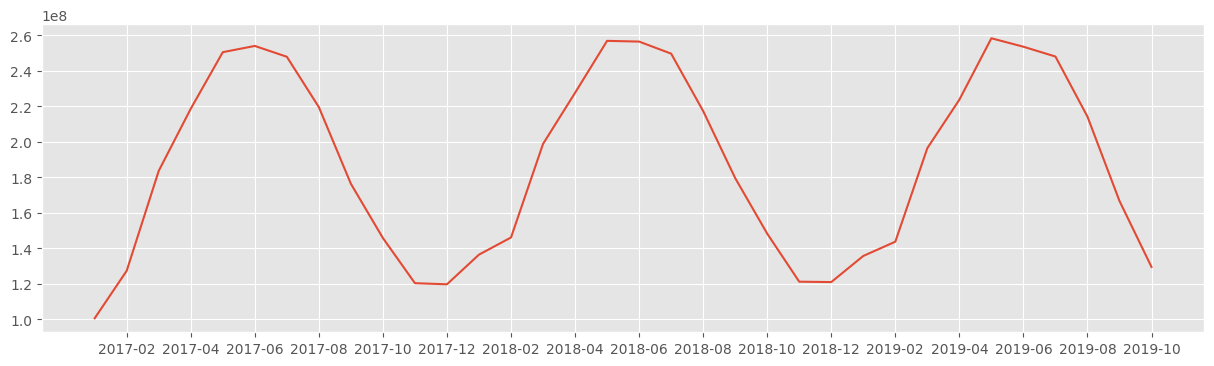

In [ ]:
plt.figure(figsize=(15, 4))

plt.plot(sales_graph['month'], sales_graph['sales'])
plt.xticks(plt.xticks()[0][1::2])

## Seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Набор стилей для графиков

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('ggplot')

<Axes: xlabel='month', ylabel='sales'>

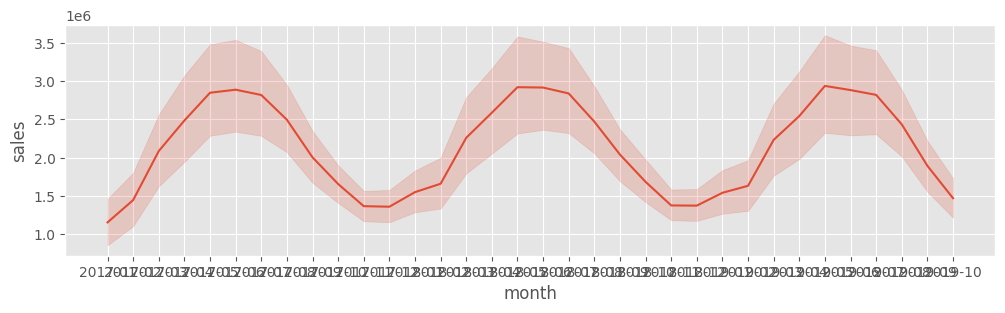

In [ ]:
plt.figure(figsize=(12, 3))
sns.lineplot(x='month', y='sales', data=sales_by_month)

Добавляем детализацию по категории

<Axes: xlabel='month', ylabel='sales'>

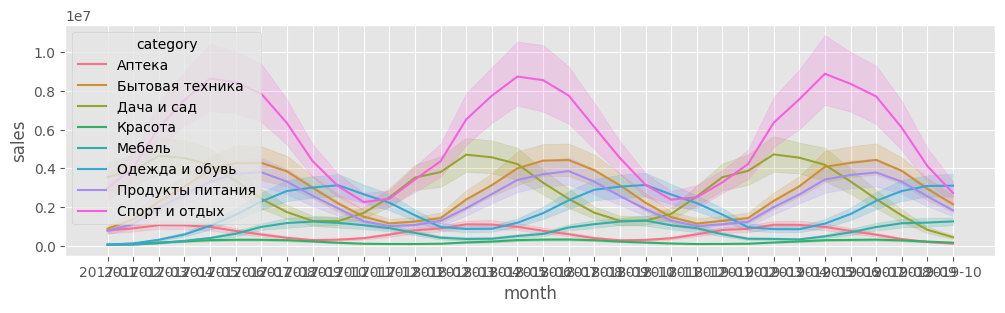

In [ ]:
plt.figure(figsize=(12, 3))
sns.lineplot(x='month', y='sales', data=sales_by_month, hue='category')

Пример из документации

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


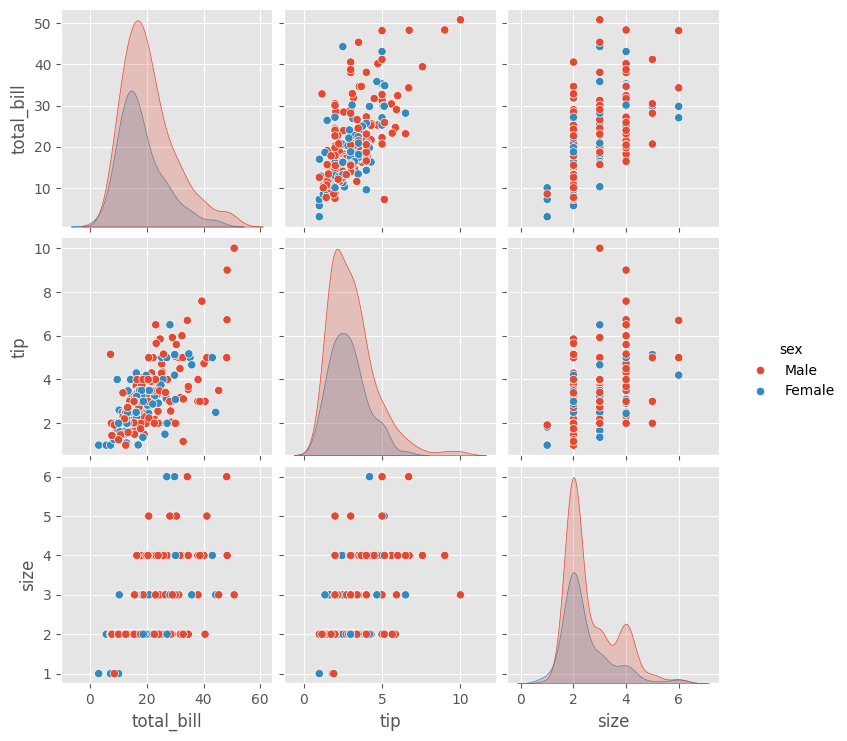

In [ ]:
sns.pairplot(df, hue ='sex')
plt.show()

Тепловая карта

In [ ]:
glue = sns.load_dataset("glue").pivot_table(
    index=["Model"],
    columns=["Task"],
    values="Score",
    aggfunc=np.average)
glue.head()


Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3


<Axes: xlabel='Task', ylabel='Model'>

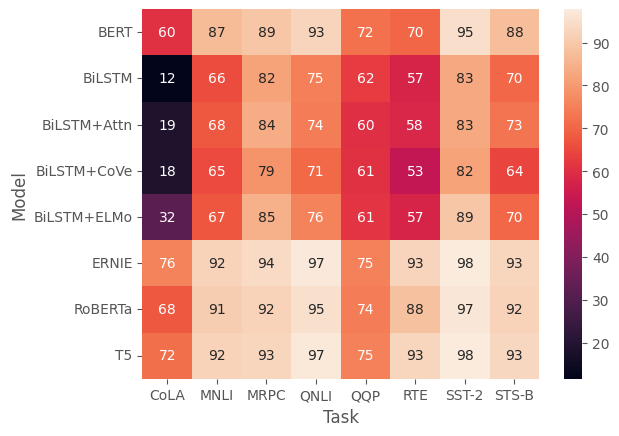

In [ ]:
sns.heatmap(glue, annot=True)

## Plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(sales_graph, x='month', y='sales', title='Продажи по месяцам')
fig.show()

In [ ]:
# добавить элемент управления - например, период

fig = px.line(sales_graph, x='month', y='sales')
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
fig.show()

### Добавим выбор региона

In [ ]:
sales_region_by_month.head()

,month,region,sales
0,2017-01,Амурская область,13892593
1,2017-01,Владимирская область,5268105
2,2017-01,Иркутская область,8489321
3,2017-01,Краснодарский край,8384608
4,2017-01,Красноярский край,5333002


In [ ]:
sales_region = sales_region_by_month.groupby(['month', 'region'], as_index=False).sum()
sales_region.head()

,month,region,sales
0,2017-01,Амурская область,13892593
1,2017-01,Владимирская область,5268105
2,2017-01,Иркутская область,8489321
3,2017-01,Краснодарский край,8384608
4,2017-01,Красноярский край,5333002


In [ ]:
fig = px.line(sales_region, x='month', y='sales', color='region')

fig.update_layout(
    updatemenus=[
        {
            "buttons": [{ "label": 'Все регионы', "method": "restyle", "args": [{"visible": [True for _ in fig.data]}], }] +
            [
                {
                    "label": t.name,
                    "method": "restyle",
                    "args": [{"visible": [t2.name == t.name for t2 in fig.data]}],
                }
                for t in fig.data
            ]
        }
    ]
)

fig.show()